In [113]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [114]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [115]:
df1= df[['Title','Review Text','Rating','Division Name', 'Department Name']]

In [116]:
df1.columns = map(str.lower, df1.columns)

In [117]:
df1.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


## EDA

In [118]:
df1.shape

(23486, 5)

In [119]:
df1.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


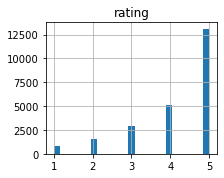

In [121]:
df1.hist(bins=25,figsize=(15, 15), layout=(5, 4));
plt.show()

In [122]:
df1['division name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [123]:
df1['department name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

<AxesSubplot:>

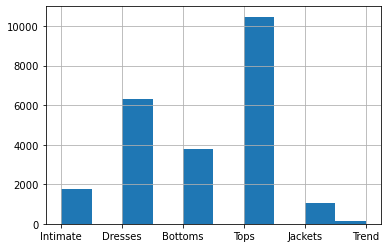

In [124]:
df1['department name'].hist()

<AxesSubplot:>

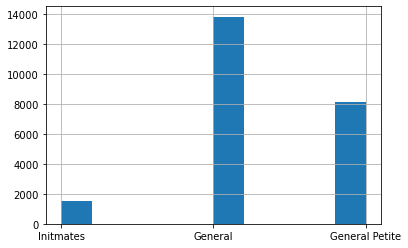

In [125]:
df1['division name'].hist()

### Average ratings per division and department

In [126]:
div_dep = df1.groupby(["division name", "department name"], as_index=False)["rating"].mean()
div_dep

,division name,department name,rating
0,General,Bottoms,4.268686
1,General,Dresses,4.163003
2,General,Jackets,4.240310
3,General,Tops,4.148749
4,General,Trend,3.822917
5,General Petite,Bottoms,4.329356
6,General Petite,Dresses,4.133256
7,General Petite,Intimate,4.240343
8,General Petite,Jackets,4.304910
9,General Petite,Tops,4.216469


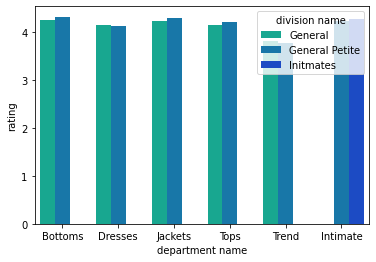

In [143]:
ax = sns.barplot(x="department name", y="rating", hue="division name", data=div_dep, palette="winter_r")

### Sample check on the review column to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

In [145]:
comment=TextBlob(df1.at[5,'review text'])

In [148]:
comment

TextBlob("I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.")

In [147]:
comment.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [149]:
comment2=TextBlob(df1.at[15,'review text'])
comment2

TextBlob("I took these out of the package and wanted them to fit so badly, but i could tell before i put them on that they wouldn't. these are for an hour-glass figure. i am more straight up and down. the waist was way too small for my body shape and even if i sized up, i could tell they would still be tight in the waist and too roomy in the hips - for me. that said, they are really nice. sturdy, linen-like fabric, pretty color, well made. i hope they make someone very happy!")

In [150]:
comment2.sentiment

Sentiment(polarity=0.1665873015873016, subjectivity=0.5941269841269842)

In [151]:
comment3=TextBlob(df1.at[155,'review text'])
comment3

TextBlob("This top is so much better in person. i do not agree with some of the other reviews about the fabric being scratchy. it is not and i have sensitive skin. i love this top and have got lots of compliments.")

In [152]:
comment3.sentiment

Sentiment(polarity=0.32916666666666666, subjectivity=0.5625)

In [153]:
comment4=TextBlob(df1.at[1155,'review text'])
comment4

TextBlob("I tried this jumpsuit on in the store and loved it but decided to wait on purchasing it. after it went on sale i jumped on it because i new i would regret not buying it. 

i am tall but most of my height is from my long legs, not in my torso. i seldom find jumpsuits that fit my frame but his one fits perfectly. the fabric is very "flowey" and does not wrinkle. the overall design of this jumpsuit is slightly but not overly baggy. the pattern and pleating make it a perfect item for spring and su")

In [154]:
comment4.sentiment

Sentiment(polarity=0.371969696969697, subjectivity=0.5021212121212122)

In [161]:
comment5=TextBlob(df1.at[9855,'review text'])
comment5

TextBlob("After multiple purchase and returns (from other sites!) i decided to splurge on a dress for my college graduation (located beach side). this dress was better than i could have hoped. the fit is very flattering, loose & tight in all the right places. the adjustable straps underneath the overlay ensure the silk lays perfectly. the colors are gorgeous and the fabric is light as a feather. the slight train & back buttons adds elegance to an otherwise "casual" floral pattern. i would highly recommend")

In [162]:
comment5.sentiment

Sentiment(polarity=0.1711535409035409, subjectivity=0.455932844932845)

### Breaking out the text of one review into sentences

In [172]:
blob = TextBlob(df1.at[9855,'review text'])

In [175]:
blob.sentences

[Sentence("After multiple purchase and returns (from other sites!)"),
 Sentence("i decided to splurge on a dress for my college graduation (located beach side)."),
 Sentence("this dress was better than i could have hoped."),
 Sentence("the fit is very flattering, loose & tight in all the right places."),
 Sentence("the adjustable straps underneath the overlay ensure the silk lays perfectly."),
 Sentence("the colors are gorgeous and the fabric is light as a feather."),
 Sentence("the slight train & back buttons adds elegance to an otherwise "casual" floral pattern."),
 Sentence("i would highly recommend")]

### Removing any rows which contain have null in the review text column 

In [177]:
df1 =df1.dropna(subset=['review text'])

In [179]:
len(df1)

22641

### Sentiment polarity for each review 

In [181]:
def sentiment(text):
    try: 
        return TextBlob(text).sentiment
    except:
        return None

In [183]:
df1['polarity']=df1['review text'].apply(sentiment).apply(lambda x:x[0])

In [184]:
df1['subjectivity']=df1['review text'].apply(sentiment).apply(lambda x:x[1])

In [185]:
df1.head()

,title,review text,rating,division name,department name,polarity,subjectivity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333,0.933333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583,0.725000
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675,0.356294
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000,0.625000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891,0.568750


### Minimum review polarity by division and department 

In [186]:
min_rev = df1.groupby(["division name", "department name"], as_index=False)["polarity"].min()
min_rev

,division name,department name,polarity
0,General,Bottoms,-0.533333
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
3,General,Tops,-0.975000
4,General,Trend,-0.270833
5,General Petite,Bottoms,-0.257778
6,General Petite,Dresses,-0.400000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
9,General Petite,Tops,-0.700000


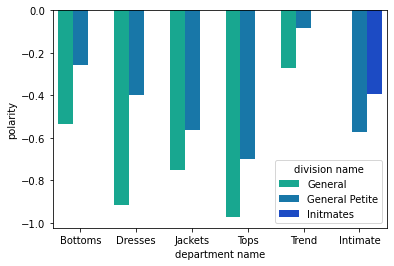

In [192]:
ax = sns.barplot(x="department name", y="polarity", hue="division name", data=min_rev, palette="winter_r")

### Average review polarity by division and department 

In [194]:
avg_rev = df1.groupby(["division name", "department name"], as_index=False)["polarity"].mean()
avg_rev

,division name,department name,polarity
0,General,Bottoms,0.245849
1,General,Dresses,0.251091
2,General,Jackets,0.237141
3,General,Tops,0.247025
4,General,Trend,0.203986
5,General Petite,Bottoms,0.259258
6,General Petite,Dresses,0.248380
7,General Petite,Intimate,0.239517
8,General Petite,Jackets,0.241773
9,General Petite,Tops,0.256835


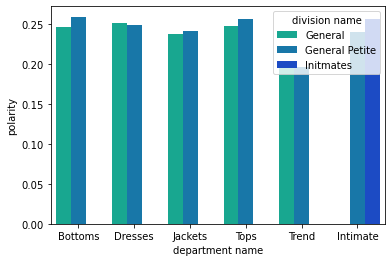

In [195]:
ax = sns.barplot(x="department name", y="polarity", hue="division name", data=avg_rev, palette="winter_r")